# **Initial imports**

In [1]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import pickle 


from sklearn import metrics
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from os import path


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# **Data Acquisition**

In [2]:
data = pd.read_csv('datasets/UNSW_NB15.csv')

# **EDA**

In [6]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [8]:
#Observation on missing or null data
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [9]:
data['service'].replace('-',np.nan,inplace=True)

In [10]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [11]:
data.shape

(175341, 45)

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(81173, 45)

In [14]:
data['attack_cat'].value_counts()

Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: attack_cat, dtype: int64

In [15]:
data['state'].value_counts()

INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: state, dtype: int64

In [16]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [17]:
features = pd.read_csv('datasets/UNSW_NB15_features.csv')

In [18]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [19]:
features['Type '] = features['Type '].str.lower()

In [20]:
# extracting column names of every data type
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [21]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [22]:
for c in integer_names:
  pd.to_numeric(data[c])

In [23]:
for c in binary_names:
  pd.to_numeric(data[c])

In [24]:
for c in float_names:
  pd.to_numeric(data[c])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81

In [26]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# **Data Visualization**

## **Binary Classification**

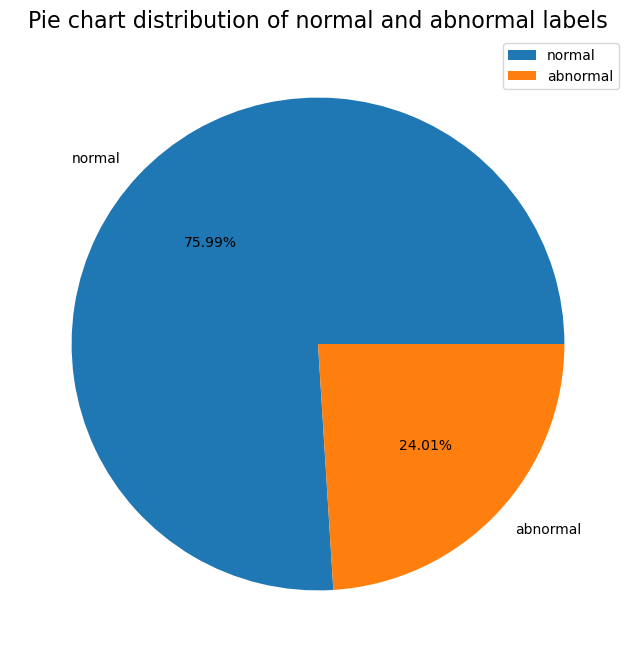

In [27]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

## **Multi-class Classification**

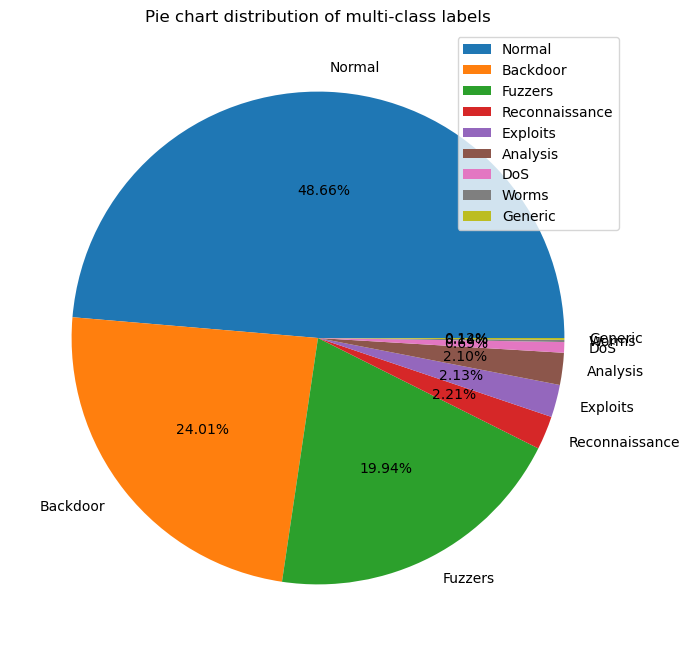

In [28]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

# **One hot encoding**

In [29]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [30]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


# **One Hot Encoding for non-numeric features**

In [31]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [32]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
data.shape

(81173, 45)

In [34]:
data = pd.concat([data, data_cat],axis=1)

In [35]:
data.shape

(81173, 64)

In [36]:
data.drop(columns=cat_col,inplace=True)

In [37]:
data.shape

(81173, 61)

# **Data Normalization**


In [38]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [39]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [40]:
# data before normalization
data.head() 


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [41]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [42]:
# after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Label Encoding**

## **Binary Labels**

In [43]:
#attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [44]:
# creating binary labels (normal and abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [45]:
# (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [46]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [47]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## **Multi-class Labels**

In [48]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [49]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [50]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [51]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [52]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

# **Correlation between features of dataset**

In [53]:
num_col.append('label')

## **Correlation Matrix for Binary Labels**

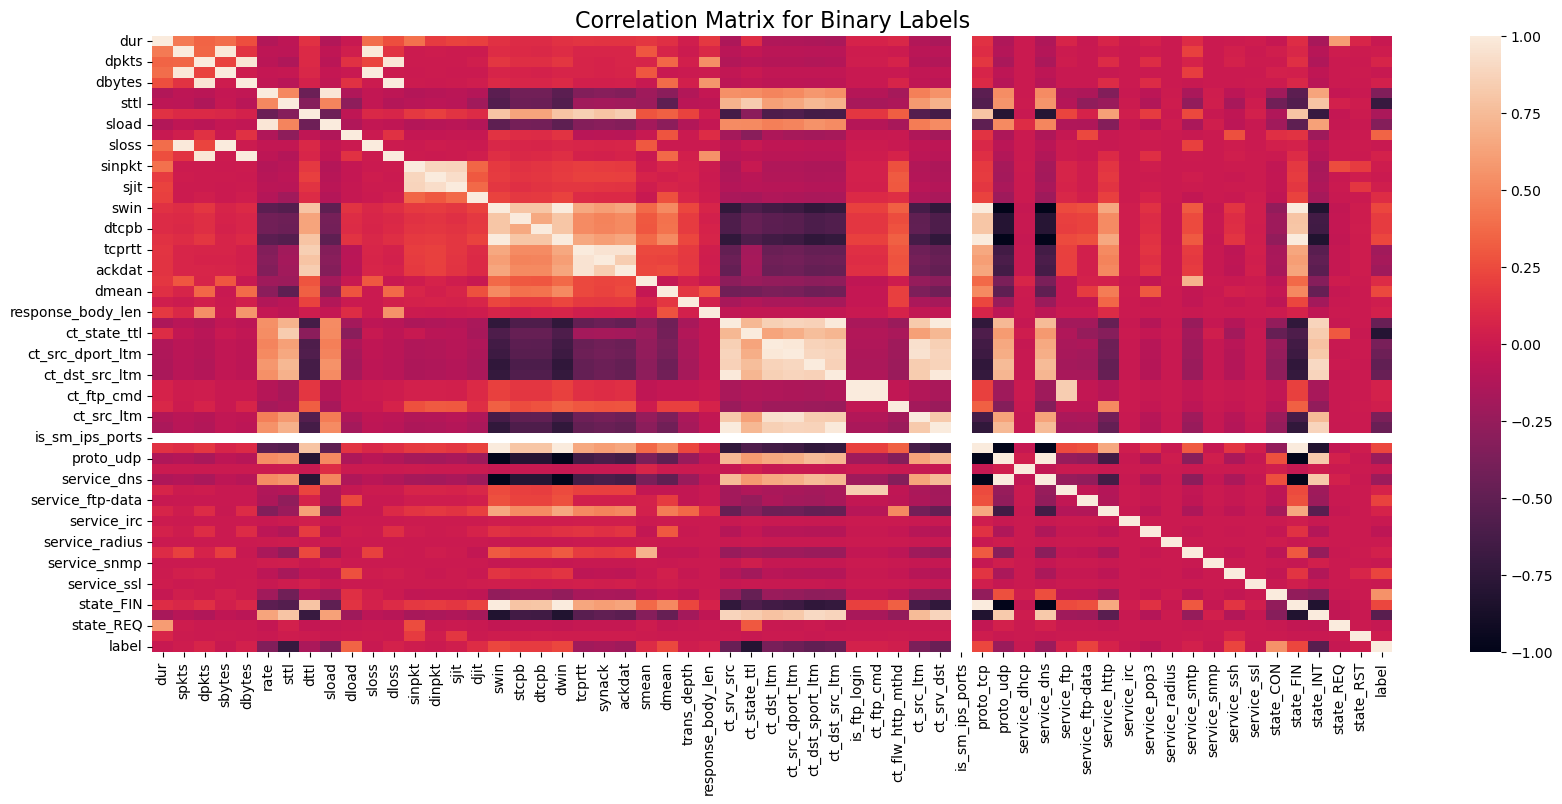

In [54]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

## **Correlation Matrix for Multi-class Labels**

In [55]:
num_col = list(multi_data.select_dtypes(include='number').columns)

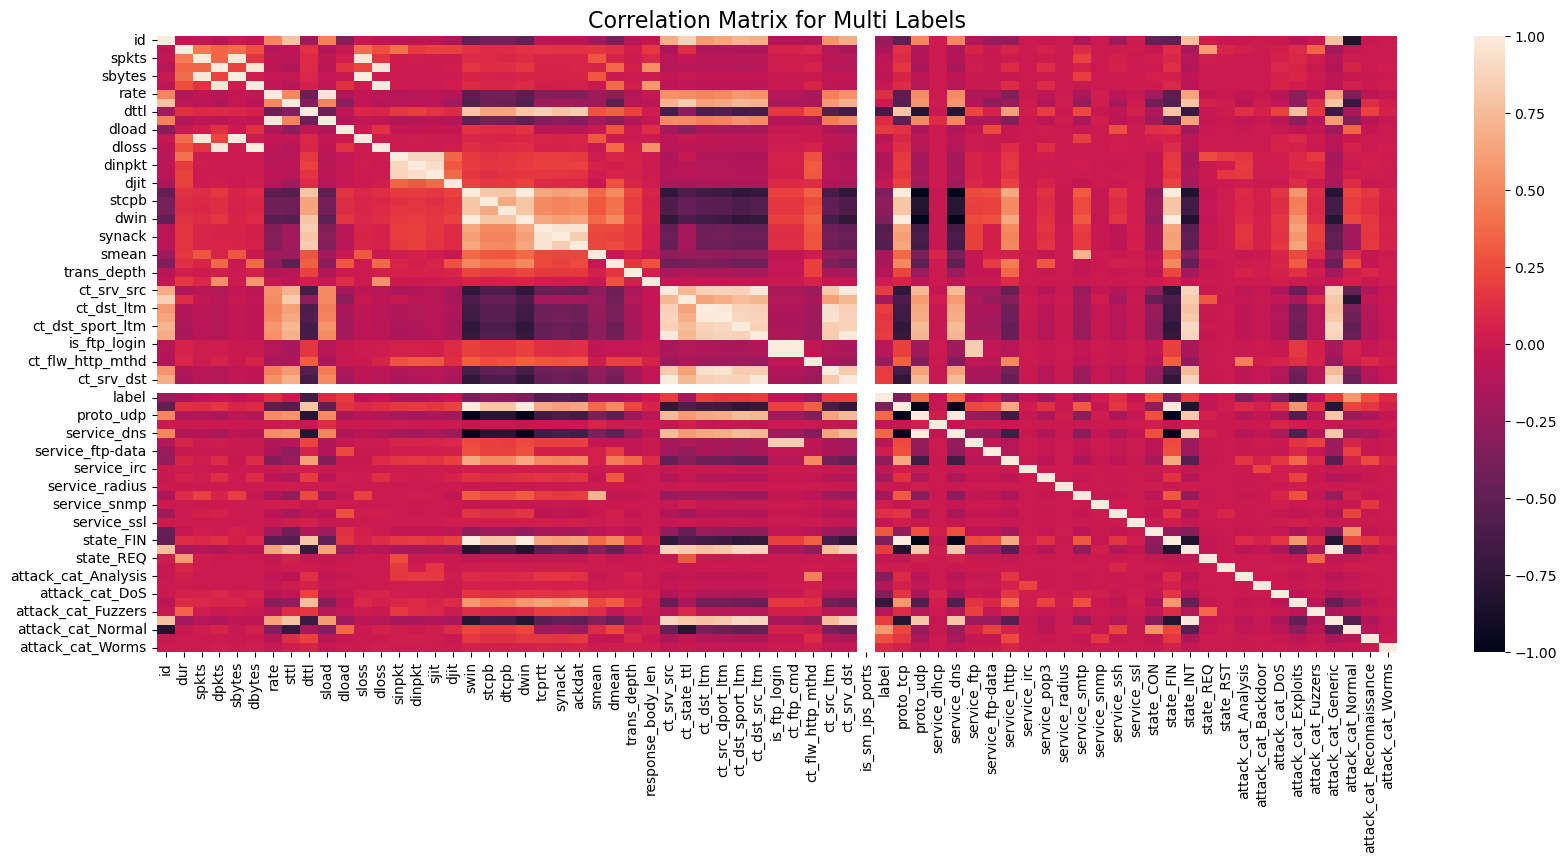

In [56]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

# **Feature Selection**

## **Binary Labels**

In [57]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

sload               0.334562
dload               0.343910
rate                0.344535
ct_src_ltm          0.368486
ct_dst_ltm          0.387358
ct_src_dport_ltm    0.444874
ct_srv_dst          0.459984
ct_srv_src          0.463153
ct_dst_src_ltm      0.463735
ct_dst_sport_ltm    0.497234
state_INT           0.546631
state_CON           0.552505
sttl                0.707337
ct_state_ttl        0.801403
label               1.000000
Name: label, dtype: float64

In [58]:
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'state_CON', 'state_INT', 'label'],
      dtype='object')

In [59]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,state_CON,state_INT,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,0.0,0.0,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,0.0,0.0,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,0.0,1.0,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,0.0,0.0,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0.0,1.0,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0.0,1.0,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0.0,1.0,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0.0,1.0,0


### **Saving Prepared Dataset to Disk**

In [60]:
bin_data.to_csv('./datasets/bin_data.csv')

## **Multi-class Labels**

In [61]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

state_CON              0.302853
attack_cat_Analysis    0.326209
attack_cat_DoS         0.339669
state_FIN              0.361750
proto_udp              0.364393
swin                   0.364393
dwin                   0.364393
proto_tcp              0.364393
service_dns            0.365346
synack                 0.524027
ackdat                 0.570098
tcprtt                 0.570205
attack_cat_Normal      0.570858
dttl                   0.646589
attack_cat_Exploits    0.719733
label                  1.000000
Name: label, dtype: float64

In [62]:
# selecting attributes found 
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label',
       'proto_tcp', 'proto_udp', 'service_dns', 'state_CON', 'state_FIN',
       'attack_cat_Analysis', 'attack_cat_DoS', 'attack_cat_Exploits',
       'attack_cat_Normal'],
      dtype='object')

In [63]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

### **Saving Prepared Dataset to Disk**

In [64]:
multi_data.to_csv('./datasets/multi_data.csv')

# **BINARY CLASSIFICATION**

## **Data Splitting**



In [65]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

## **Linear Regression**

In [67]:
lr_bin = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
lr_bin.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = lr_bin.predict(X_test)

In [69]:
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)

In [70]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.021927933477055742
Mean Squared Error -  0.021927933477055742
Root Mean Squared Error -  0.1480808342664767
Accuracy -  97.80720665229443


In [75]:

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9784716833683103
Recall: 0.9780720665229442
F1-score: 0.9777511814242362


In [76]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)

In [77]:
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       0.99      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



In [79]:
from sklearn.metrics import classification_report
target_names = le1.classes_

cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)


report_df = pd.DataFrame(cls_report).transpose()


report_file_path = "cls_reports/bin_lin_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/bin_lin_report.csv


### **Real and Predicted Data**

In [80]:
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_bin_df.to_csv('./predictions/lr_real_pred_bin.csv')
lr_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


### **Plot between Real and Predicted Data**

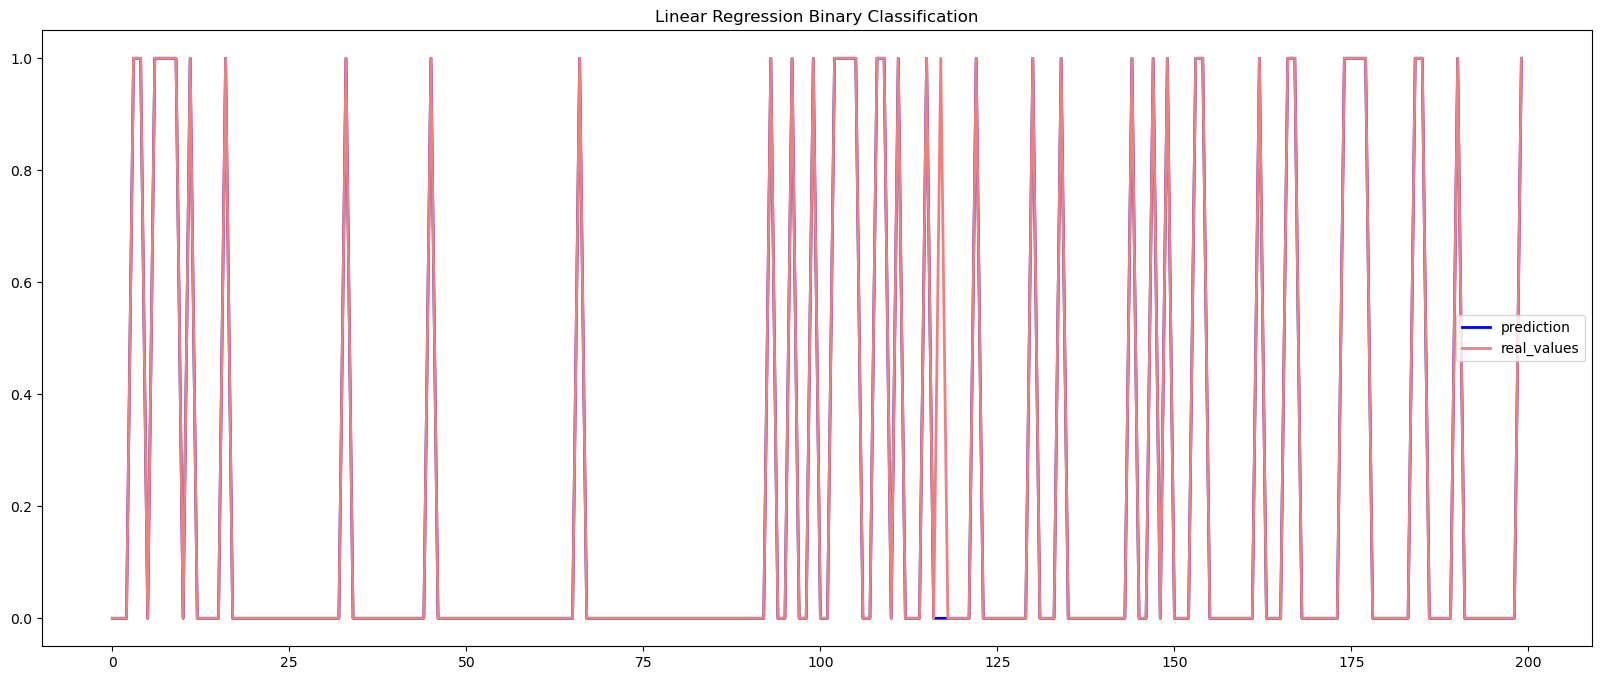

In [81]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear Regression Binary Classification")
plt.savefig('plots/lr_real_pred_bin.png')
plt.show()

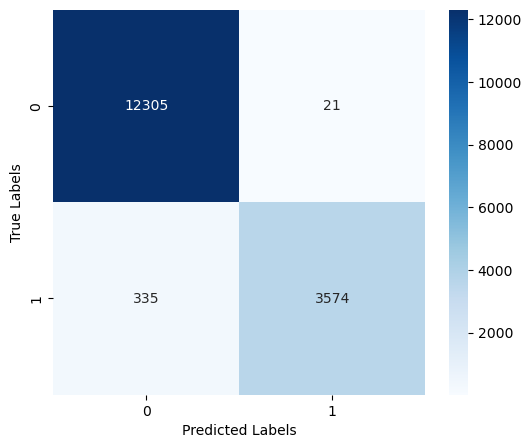

In [82]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/linear_reg_cm.png')
plt.show()

### **Saving Trained Model to Disk**

In [83]:
pkl_filename = "./models/linear_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_bin, file)
  print("Saved model to disk")
else:
  print("Previous Model exists on the disk! Please Remove")

Previous Model exists on the disk! Please Remove


## **Logistic Regression**

In [84]:
logr_bin = LogisticRegression(random_state=123, max_iter=5000)
logr_bin

LogisticRegression(max_iter=5000, random_state=123)

In [85]:
logr_bin.fit(X_train,y_train)

LogisticRegression(max_iter=5000, random_state=123)

In [86]:
y_pred = logr_bin.predict(X_test)

In [87]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)


Mean Absolute Error -  0.02198952879581152
Mean Squared Error -  0.02198952879581152
Root Mean Squared Error -  0.1482886671186019
Accuracy -  97.80104712041884


In [88]:

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9784222126595946
Recall: 0.9780104712041885
F1-score: 0.9776854078157222


In [89]:

cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)
     

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       0.99      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



In [90]:
target_names = le1.classes_
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)


report_df = pd.DataFrame(cls_report).transpose()


report_file_path = "cls_reports/bin_log_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/bin_log_report.csv


### **Real and Predicted Data**

In [91]:
logr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_bin_df.to_csv('./predictions/logr_real_pred_bin.csv')
logr_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


### **Plot between Real and Predicted Data**

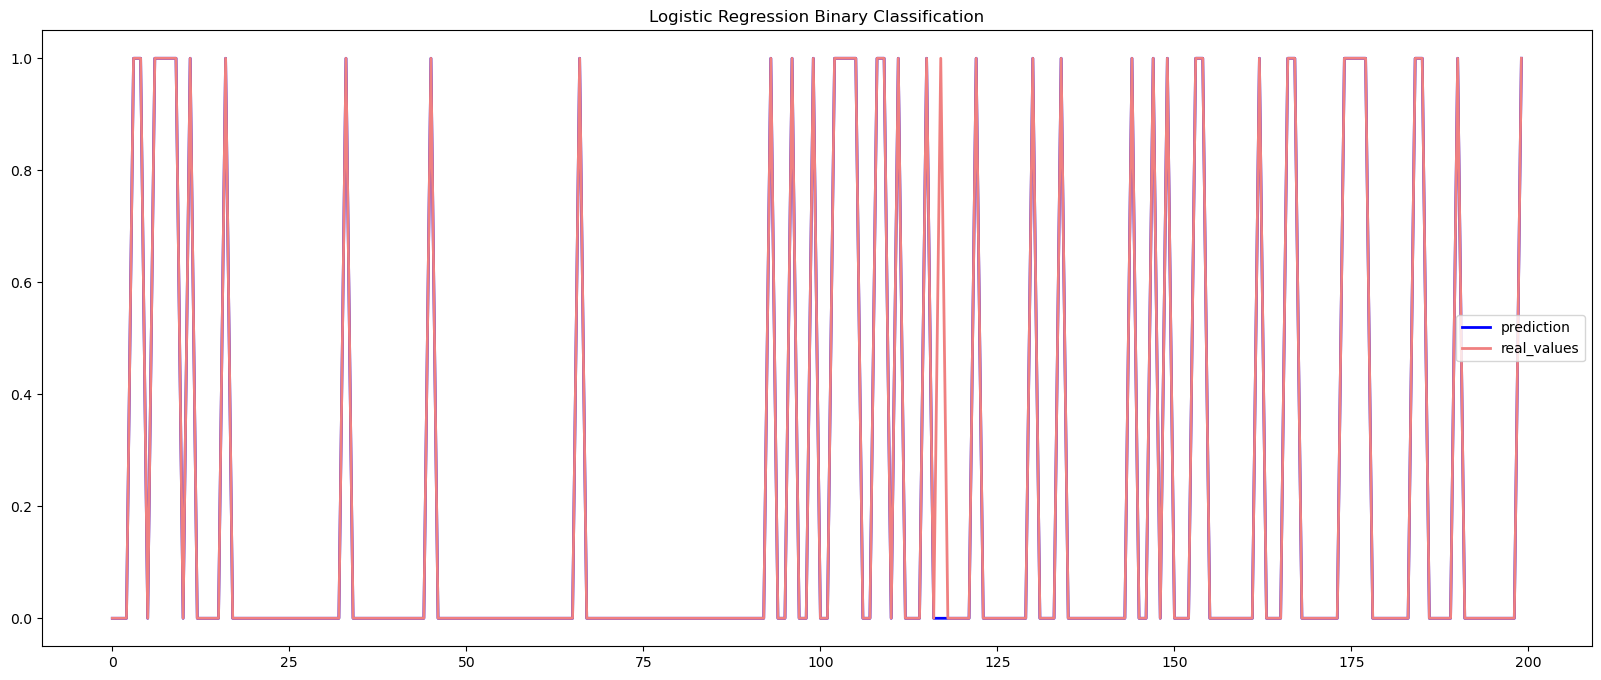

In [92]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Binary Classification")
plt.savefig('plots/logr_real_pred_bin.png')
plt.show()

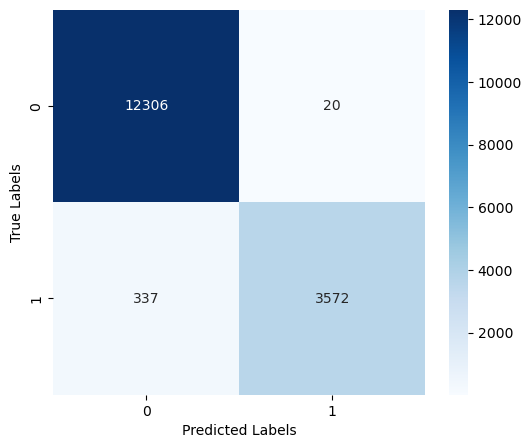

In [93]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/log_reg_cm.png')
plt.show()

### **Saving Trained Model to Disk**

In [94]:
pkl_filename = "./models/logistic_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **K Nearest Neighbor Classifier**

In [95]:
knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)

KNeighborsClassifier()

In [96]:
y_pred = knn_bin.predict(X_test)

In [97]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.016938712657838004
Mean Squared Error -  0.016938712657838004
Root Mean Squared Error -  0.13014880966738807
Accuracy -  98.3061287342162


In [98]:

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9830060907887808
Recall: 0.983061287342162
F1-score: 0.9830079895283129


In [99]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.97      0.96      0.96      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.97      0.98     16235
weighted avg       0.98      0.98      0.98     16235



In [100]:
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)


report_df = pd.DataFrame(cls_report).transpose()


report_file_path = "cls_reports/bin_knn_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/bin_knn_report.csv


### **Real and Predicted Data**

In [101]:
knn_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_bin_df.to_csv('./predictions/knn_real_pred_bin.csv')
knn_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


### **Plot between Real and Predicted Data**

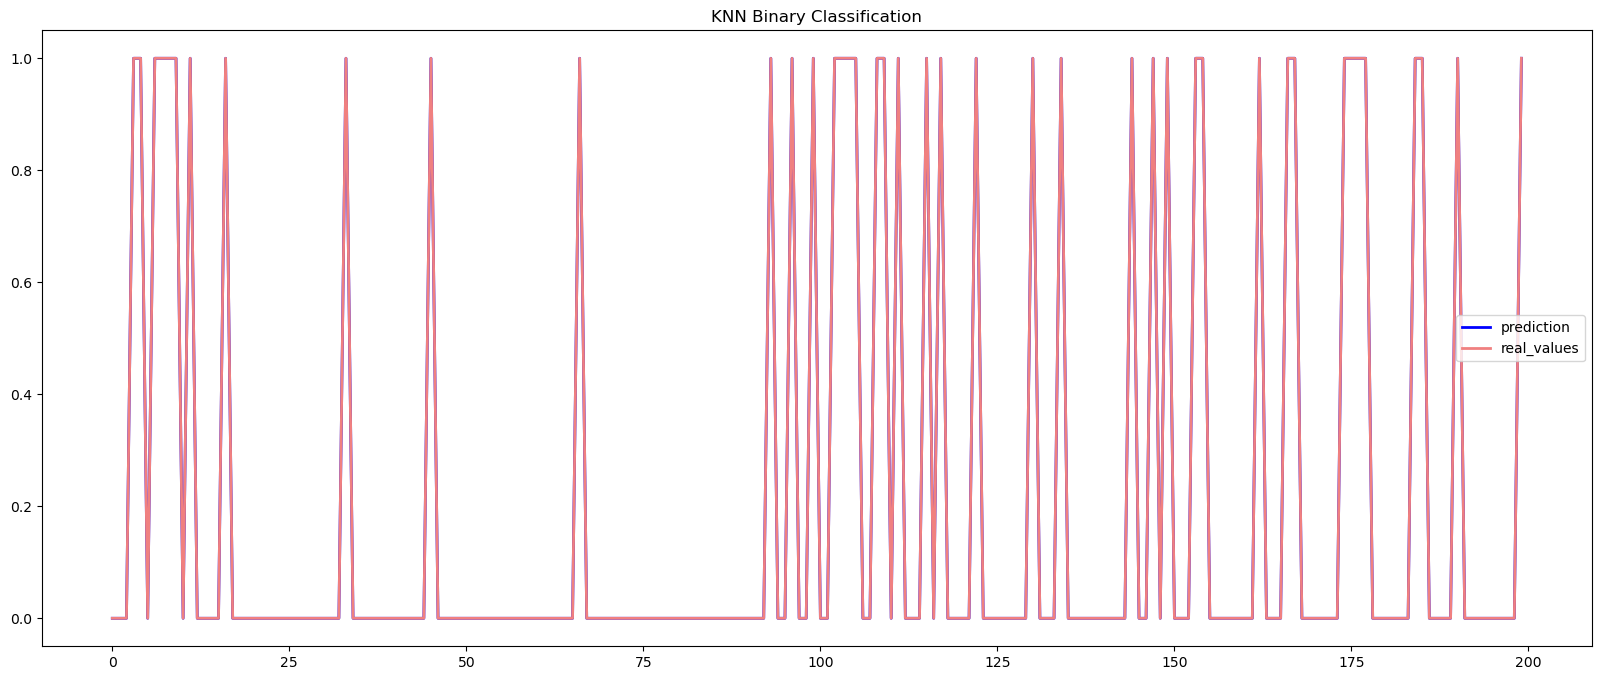

In [102]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("KNN Binary Classification")
plt.savefig('plots/knn_real_pred_bin.png')
plt.show()

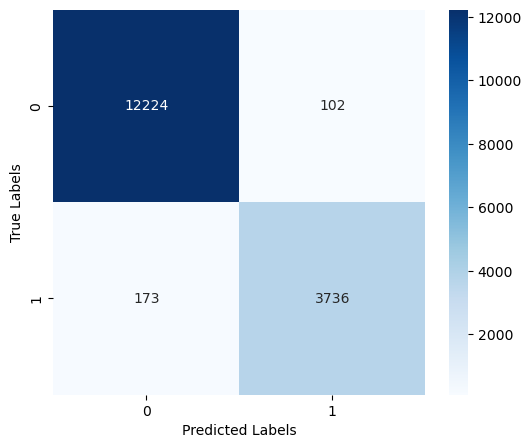

In [103]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/knn_cm.png')
plt.show()

### **Saving Trained Model to Disk**

In [104]:
pkl_filename = "./models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Random Forest Classifier**

In [105]:
 rf_bin = RandomForestClassifier(random_state=123)
 rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [106]:
y_pred = rf_bin.predict(X_test)

In [107]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.013427779488758854
Mean Squared Error -  0.013427779488758854
Root Mean Squared Error -  0.11587829602112232
Accuracy -  98.65722205112412


In [108]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9865378412177614
Recall: 0.9865722205112412
F1-score: 0.9865365967342316


In [109]:
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=le1.classes_)

print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.98      0.96      0.97      3909

    accuracy                           0.99     16235
   macro avg       0.98      0.98      0.98     16235
weighted avg       0.99      0.99      0.99     16235



In [110]:
target_names = le1.classes_
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)


report_df = pd.DataFrame(cls_report).transpose()


report_file_path = "cls_reports/bin_rf_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/bin_rf_report.csv


### **Real and Predicted Data**

In [111]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('./predictions/rf_real_pred_bin.csv')
rf_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


### **Plot between Real and Predicted Data**

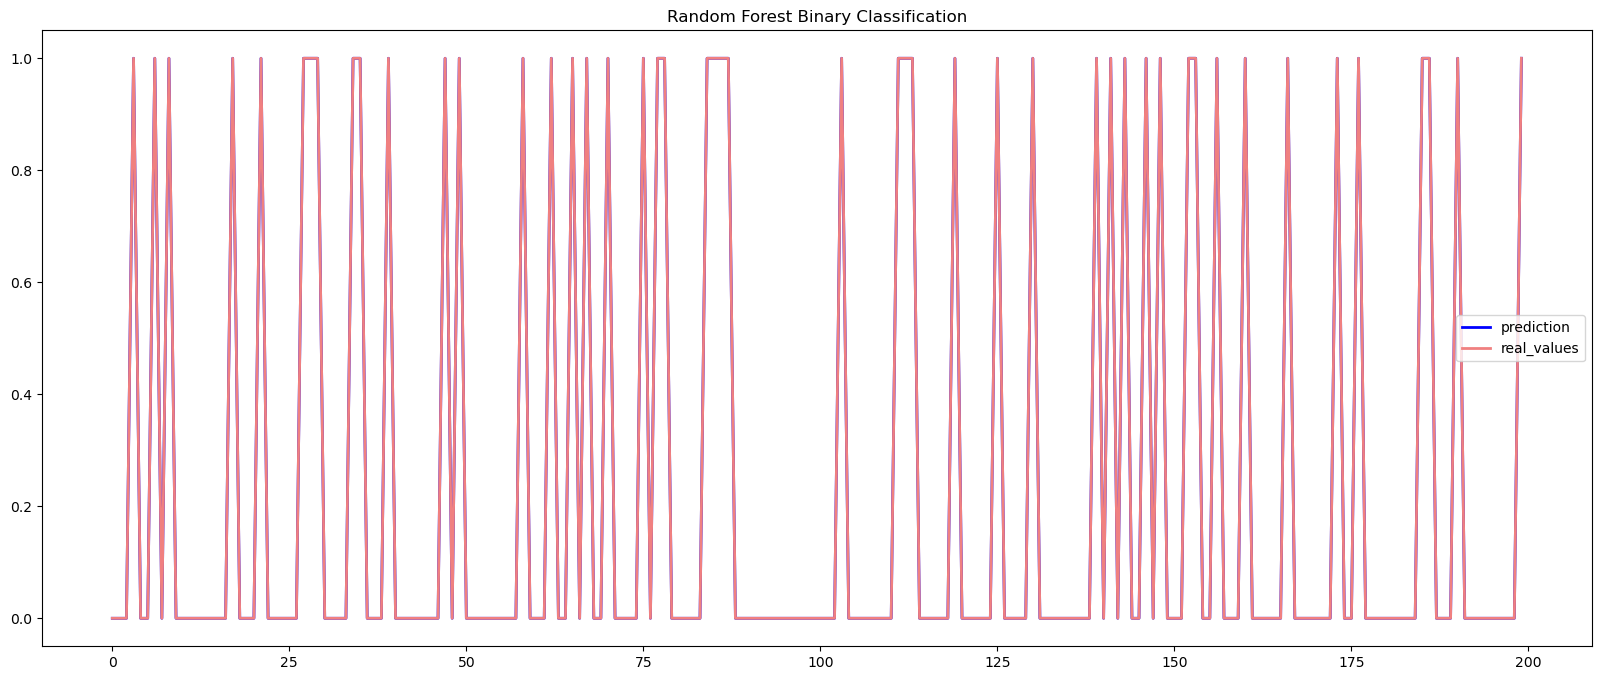

In [112]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('plots/rf_real_pred_bin.png')
plt.show()

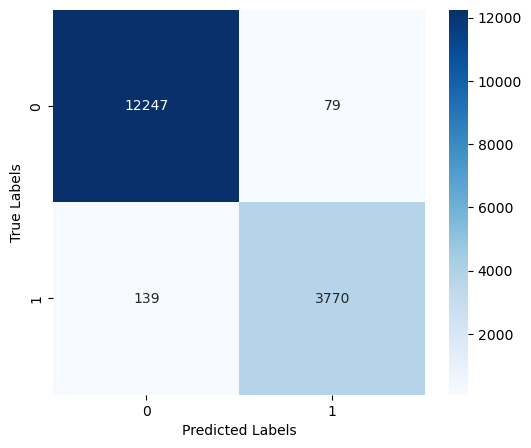

In [113]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/random_forest_cm.png')
plt.show()

### **Saving Trained Model to Disk**

In [114]:
pkl_filename = "./models/random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Decision Tree Classifier**

In [115]:
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [116]:
y_pred = dt_bin.predict(X_test)

In [117]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.019094548814290114
Mean Squared Error -  0.019094548814290114
Root Mean Squared Error -  0.13818302650575473
Accuracy -  98.09054511857099


In [118]:
recision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9865378412177614
Recall: 0.9809054511857099
F1-score: 0.9809368925597282


In [119]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.96      0.97      0.96      3909

    accuracy                           0.98     16235
   macro avg       0.97      0.98      0.97     16235
weighted avg       0.98      0.98      0.98     16235



In [120]:
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)


report_df = pd.DataFrame(cls_report).transpose()


report_file_path = "cls_reports/bin_dTree_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/bin_dTree_report.csv


### **Real and Predicted Data**

In [121]:
dt_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_bin_df.to_csv('./predictions/dt_real_pred_bin.csv')
dt_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


### **Plot between Real and Predicted Data**

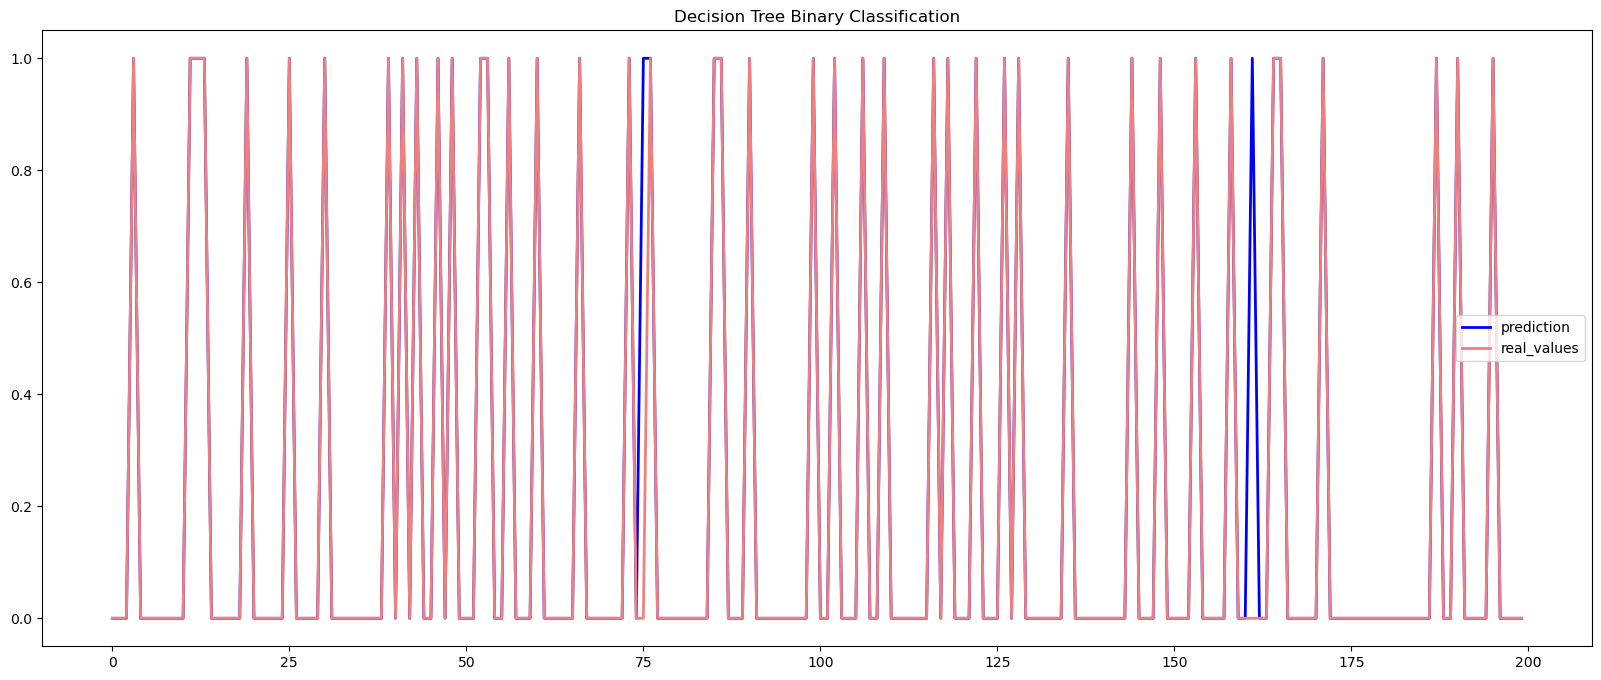

In [122]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Binary Classification")
plt.savefig('plots/dt_real_pred_bin.png')
plt.show()

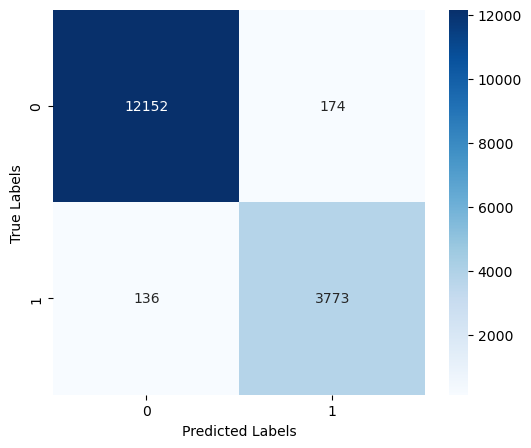

In [123]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/decision_tree_confusion_matrix.png')
plt.show()

### **Saving Trained Model to Disk**

In [124]:
pkl_filename = "./models/decision_tree_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **MULTI-CLASS CLASSIFICATION**

## **Data Splitting**

In [149]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

## **Linear Regression**

In [152]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

LinearRegression()

In [153]:
y_pred = lr_multi.predict(X_test)

In [154]:
for i in range(len(y_pred)):
  y_pred[i] = int(round(y_pred[i]))

In [155]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  3.765234888304862
Mean Squared Error -  15.603851839684625
Root Mean Squared Error -  3.9501711152410377
Accuracy -  0.8130749014454665


In [156]:
recision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9865378412177614
Recall: 0.008130749014454665
F1-score: 0.006820161185916493


/Users/refah/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
print(classification_report(y_test, y_pred,target_names=le2.classes_, zero_division=0))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      1.00      0.00        32
           DoS       0.00      0.00      0.00       521
      Exploits       0.00      0.00      0.00      4900
       Fuzzers       0.00      0.00      0.00       508
       Generic       0.00      0.00      0.00     11839
        Normal       0.00      0.00      0.00      5855
Reconnaissance       0.00      0.00      0.00       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.01     24352
     macro avg       0.11      0.22      0.11     24352
  weighted avg       0.01      0.01      0.01     24352



In [158]:
target_names = le2.classes_
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True,zero_division=0)

report_df = pd.DataFrame(cls_report).transpose()

report_file_path = "cls_reports/multi/lin_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/multi/lin_report.csv


### **Real and Predicted Data**

In [159]:
lr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_multi_df.to_csv('./predictions/lr_real_pred_multi.csv')
lr_multi_df

,Actual,Predicted
22650,6,1.0
27815,6,1.0
49033,3,1.0
156811,5,1.0
136878,5,1.0
...,...,...
94950,4,1.0
148684,5,1.0
12788,6,1.0
81439,3,1.0


### **Plot between Real and Predicted Data**

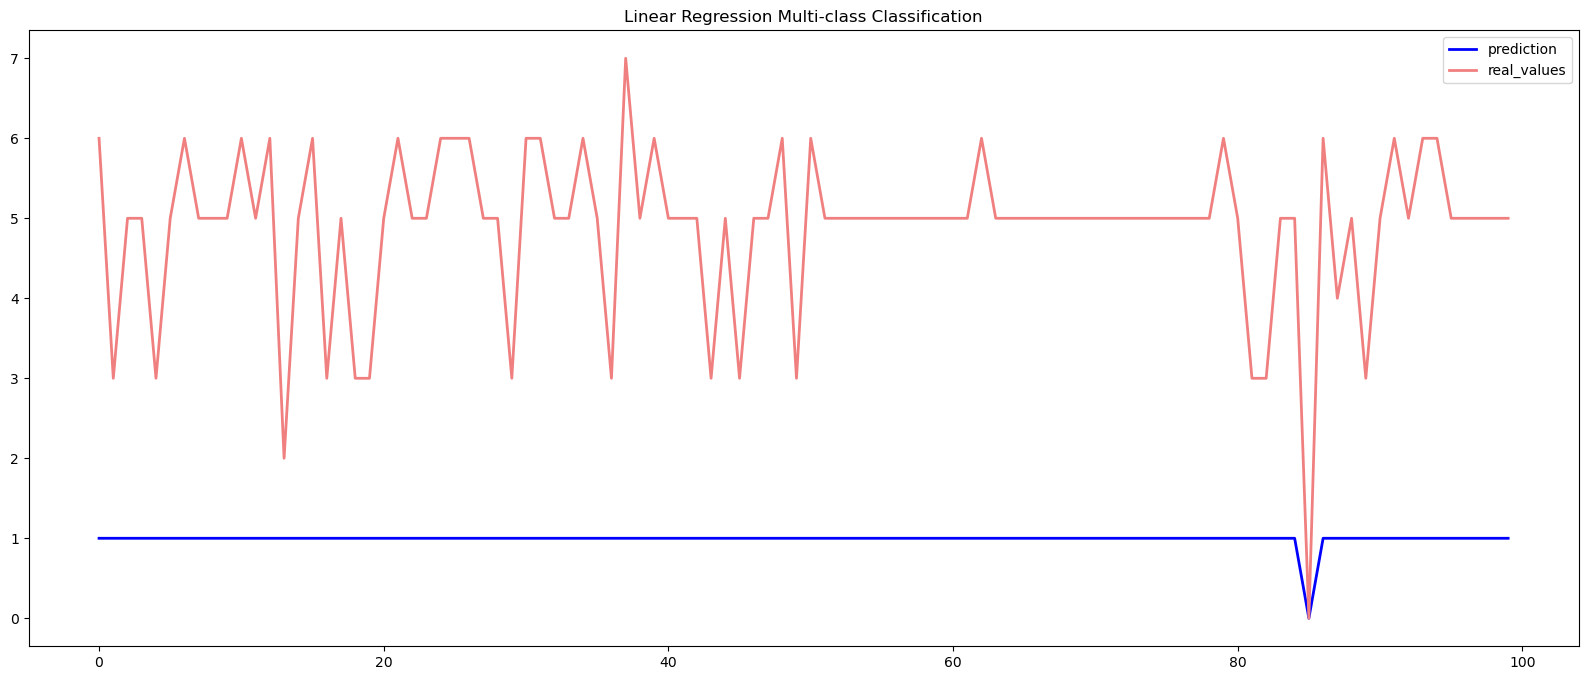

In [160]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear Regression Multi-class Classification")
plt.savefig('plots/lr_real_pred_multi.png')
plt.show()

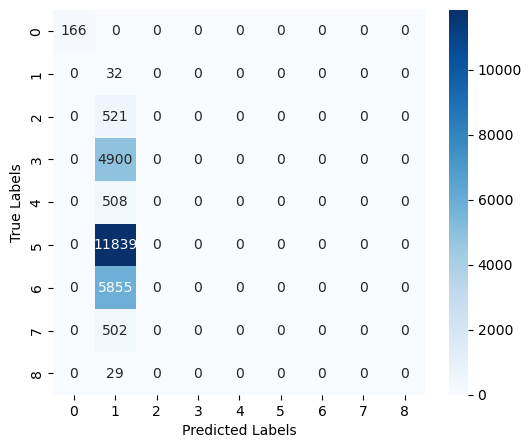

In [161]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/multi_cm/lin.png')
plt.show()

### **Saving Trained Model to Disk**

In [162]:
pkl_filename = "./models/linear_regressor_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Logistic Regression**

In [163]:
logr_multi = LogisticRegression(random_state=123, max_iter=5000,solver='newton-cg',multi_class='multinomial')
logr_multi.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=123,
                   solver='newton-cg')

In [164]:
y_pred = logr_multi.predict(X_test)

In [165]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.060077201051248356
Mean Squared Error -  0.18056011826544022
Root Mean Squared Error -  0.42492366169165047
Accuracy -  97.58952036793693


In [166]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.974725080322248
Recall: 0.9758952036793692
F1-score: 0.9747315892338732


/Users/refah/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
print(classification_report(y_test, y_pred,target_names=le2.classes_,zero_division=0))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.56      0.42      0.48       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.76      0.63       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.98     24352
     macro avg       0.68      0.69      0.68     24352
  weighted avg       0.97      0.98      0.97     24352



In [168]:

target_names = le2.classes_
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)

report_df = pd.DataFrame(cls_report).transpose()

report_file_path = "cls_reports/multi/log_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/multi/log_report.csv


/Users/refah/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/refah/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/refah/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Real and Predicted Data**

In [169]:
logr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_multi_df.to_csv('./predictions/logr_real_pred_multi.csv')
logr_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


### **Plot between Real and Predicted Data**

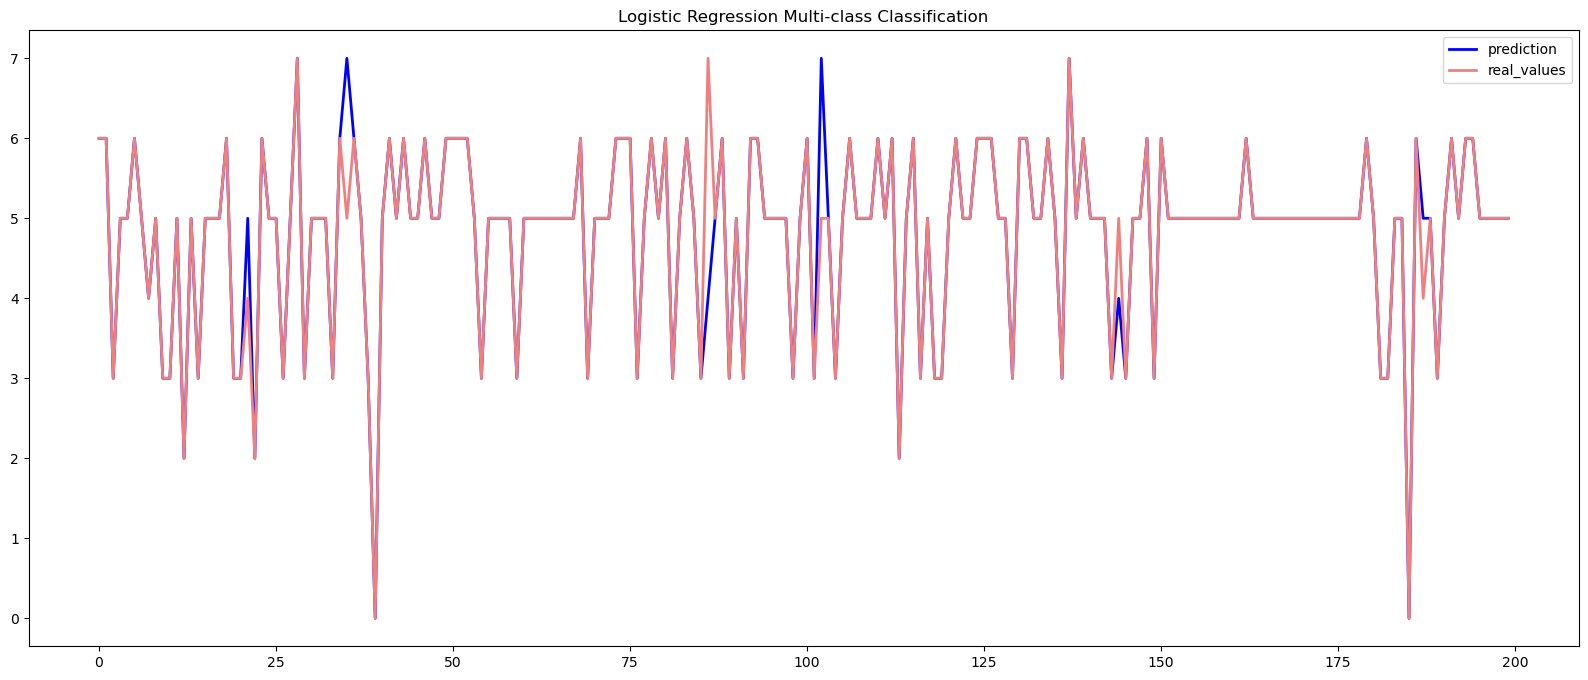

In [170]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Multi-class Classification")
plt.savefig('plots/logr_real_pred_multi.png')
plt.show()

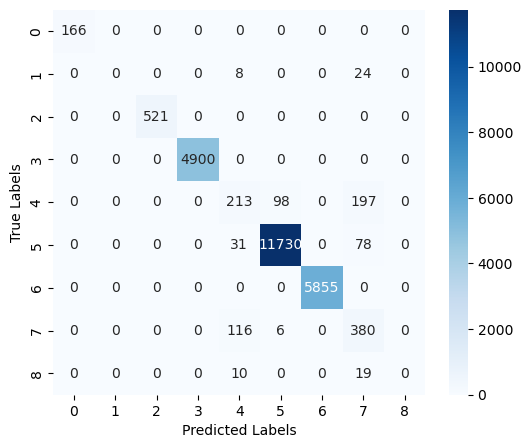

In [171]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/multi_cm/log.png')
plt.show()

### **Saving Trained Model to Disk**

In [172]:
pkl_filename = "./models/logistic_regressor_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **K Nearest Neighbor Classifier**

In [173]:
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train,y_train)

KNeighborsClassifier()

In [174]:
y_pred = knn_multi.predict(X_test)

In [175]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06496386333771353
Mean Squared Error -  0.19374178712220763
Root Mean Squared Error -  0.44016109224033834
Accuracy -  97.3718791064389


In [176]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9721987811278235
Recall: 0.973718791064389
F1-score: 0.9729445201514811


In [177]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.48      0.52      0.50       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.55      0.54      0.55       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.97     24352
     macro avg       0.67      0.67      0.67     24352
  weighted avg       0.97      0.97      0.97     24352



In [178]:
target_names = le2.classes_
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)

report_df = pd.DataFrame(cls_report).transpose()

report_file_path = "cls_reports/multi/knn_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/multi/knn_report.csv


### **Real and Predicted Data**

In [179]:
knn_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_multi_df.to_csv('./predictions/knn_real_pred_multi.csv')
knn_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


### **Plot between Real and Predicted Data**

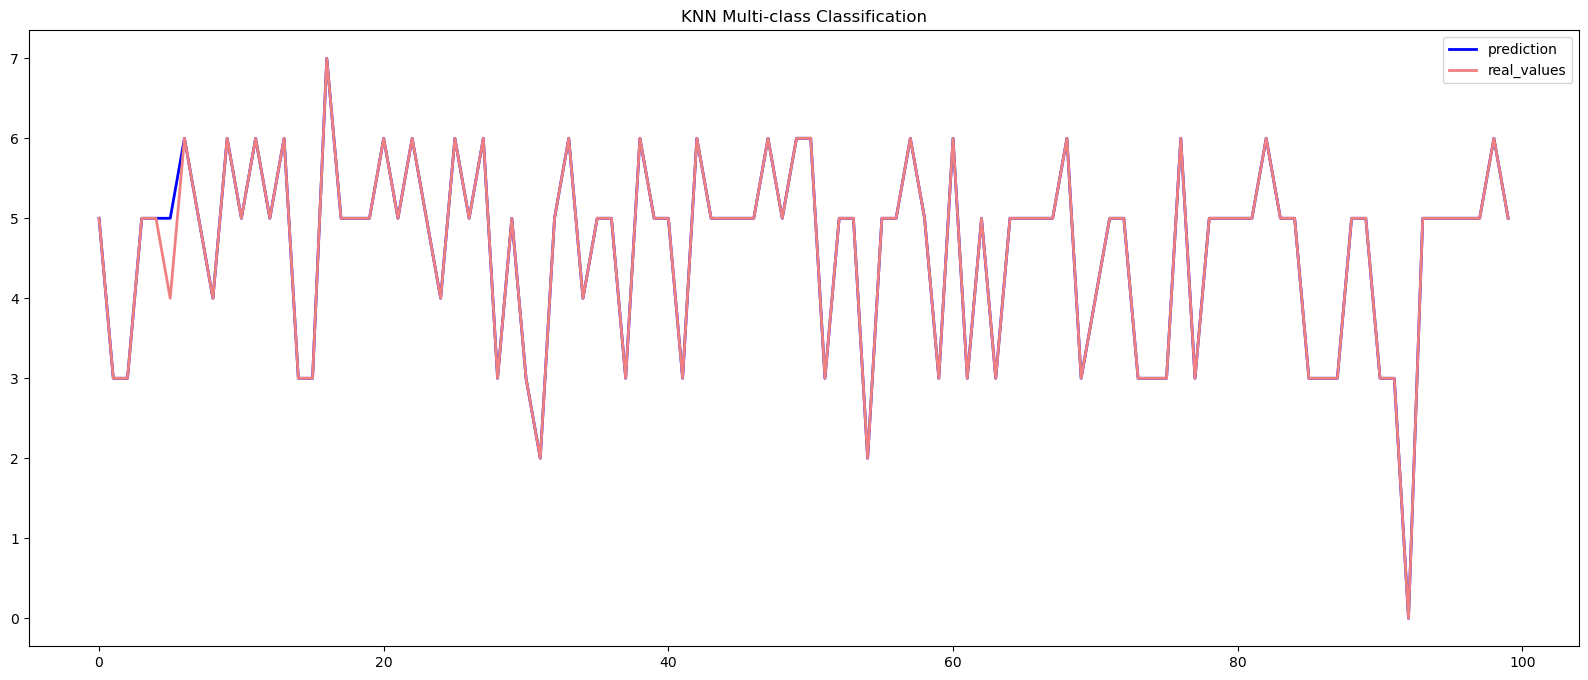

In [180]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("KNN Multi-class Classification")
plt.savefig('plots/knn_real_pred_multi.png')
plt.show()

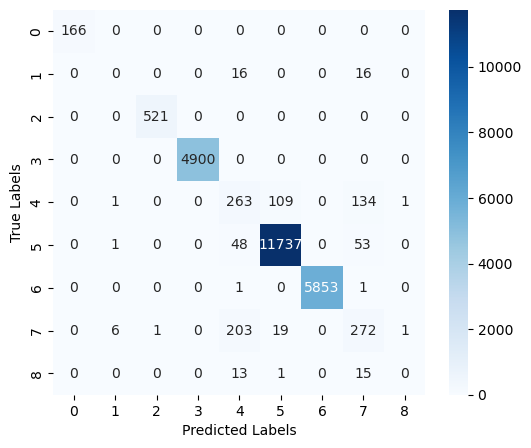

In [181]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/multi_cm/knn.png')
plt.show()

### **Saving Trained Model to Disk**

In [182]:
pkl_filename = "./models/knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Random Forest Classifier**

In [183]:
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [184]:
y_pred = rf_multi.predict(X_test)

In [185]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06574408672798948
Mean Squared Error -  0.19567181340341655
Root Mean Squared Error -  0.44234806815834127
Accuracy -  97.31849540078844


In [186]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9718416307079796
Recall: 0.9731849540078844
F1-score: 0.9723946873543589


In [187]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.09      0.03      0.05        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.49      0.43      0.45       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.61      0.57       502
         Worms       0.13      0.07      0.09        29

      accuracy                           0.97     24352
     macro avg       0.69      0.68      0.68     24352
  weighted avg       0.97      0.97      0.97     24352



In [188]:

target_names = le2.classes_
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)

report_df = pd.DataFrame(cls_report).transpose()

report_file_path = "cls_reports/multi/rf_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)

Classification report table saved to cls_reports/multi/rf_report.csv


### **Real and Predicted Data**

In [189]:
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df.to_csv('./predictions/rf_real_pred_multi.csv')
rf_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


### **Plot between Real and Predicted Data**

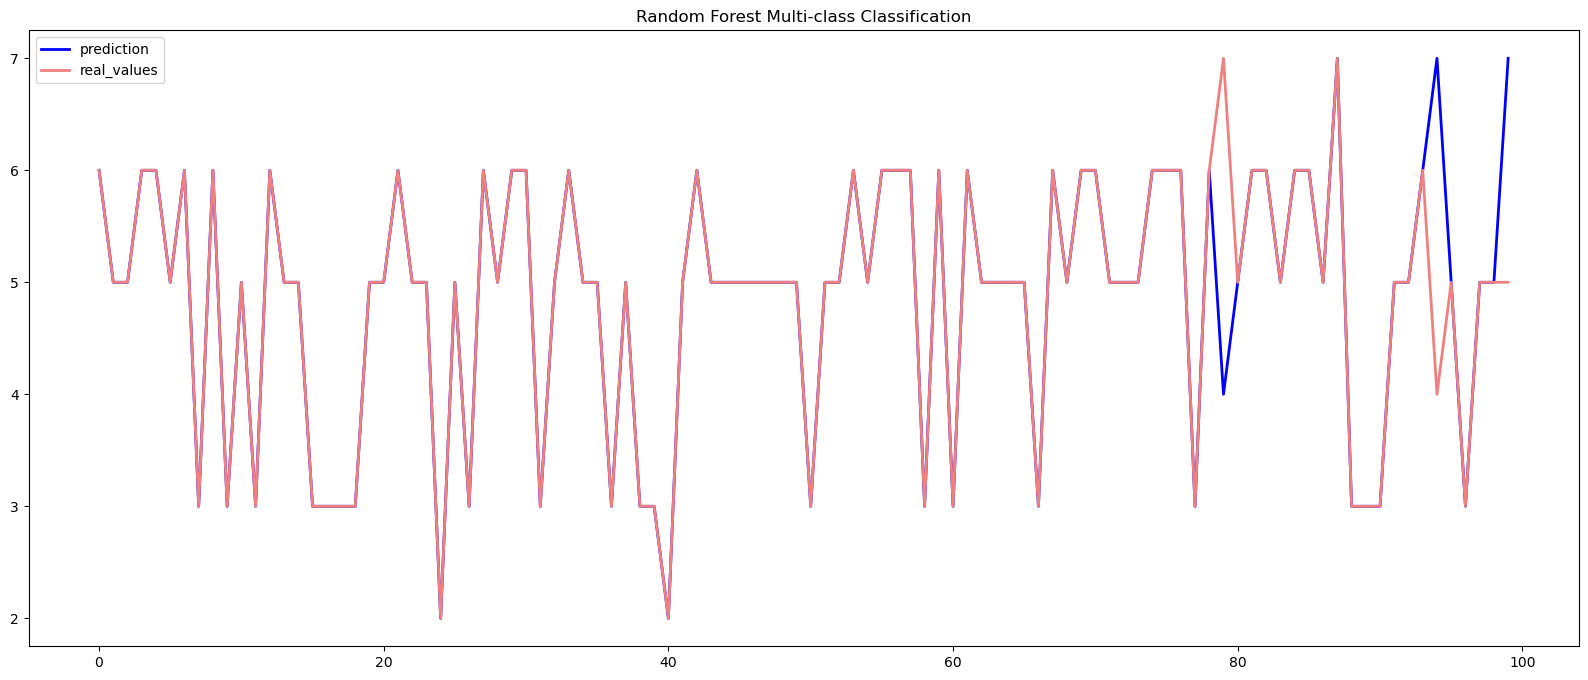

In [190]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.savefig('plots/rf_real_pred_multi.png')
plt.show()

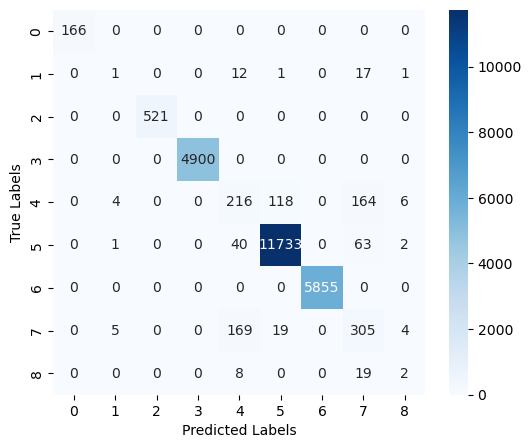

In [191]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/multi_cm/rf.png')
plt.show()

### **Saving Trained Model to Disk**

In [192]:
pkl_filename = "./models/random_forest_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Decision Tree Classifier**

In [193]:
dt_multi = DecisionTreeClassifier(random_state=123)
dt_multi.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [194]:
y_pred = dt_multi.predict(X_test)

In [195]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06808475689881735
Mean Squared Error -  0.20540407358738502
Root Mean Squared Error -  0.45321526186502703
Accuracy -  97.19119579500656


In [196]:
 precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9700049715907582
Recall: 0.9719119579500657
F1-score: 0.9708032438871861


In [197]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.08      0.06      0.07        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.50      0.39      0.44       508
       Generic       0.98      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.56      0.55       502
         Worms       0.05      0.07      0.06        29

      accuracy                           0.97     24352
     macro avg       0.68      0.67      0.68     24352
  weighted avg       0.97      0.97      0.97     24352



In [198]:

target_names = le2.classes_
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names, output_dict=True)

report_df = pd.DataFrame(cls_report).transpose()

report_file_path = "cls_reports/multi/dTree_report.csv"


report_df.to_csv(report_file_path)

print("Classification report table saved to", report_file_path)


Classification report table saved to cls_reports/multi/dTree_report.csv


### **Real and Predicted Data**

In [199]:
dt_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_multi_df.to_csv('./predictions/dt_real_pred_multi.csv')
dt_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


### **Plot between Real and Predicted Data**

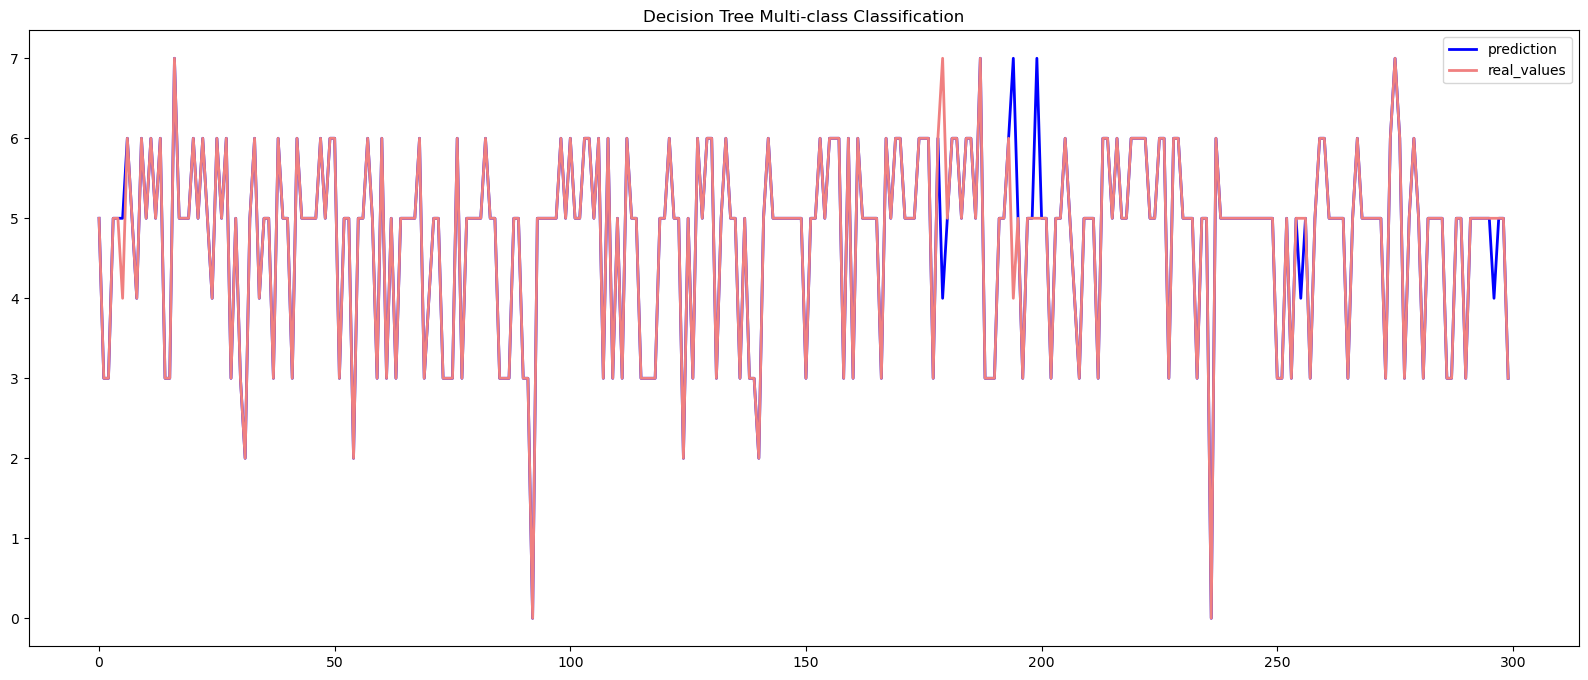

In [200]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:700], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:700].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Multi-class Classification")
plt.savefig('plots/dt_real_pred_multi.png')
plt.show()

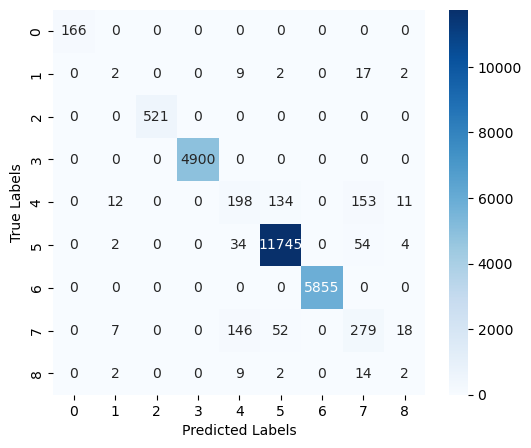

In [201]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('plots/multi_cm/dTree.png')
plt.show()

### **Saving Trained Model to Disk**

In [202]:
pkl_filename = "./models/decision_tree_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved
